<a href="https://colab.research.google.com/github/Shiny12345shiny/Phase512345/blob/main/Copy_of_Untitled42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Description
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130

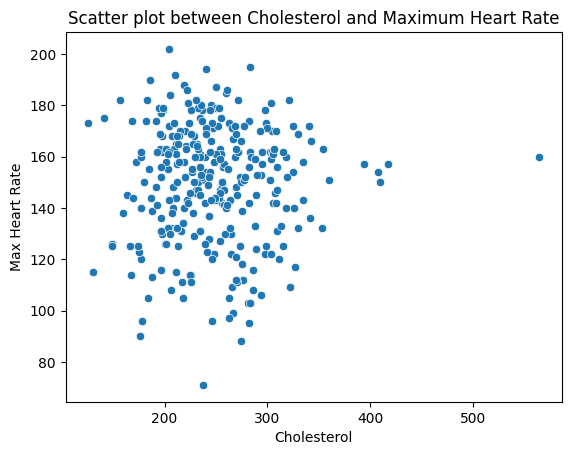


8. Feature Engineering
        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak   ca  \
0  0.708333  1.0  0.481132  0.244292  1.0  0.603053    0.0  0.370968  0.0   
1  0.791667  1.0  0.622642  0.365297  0.0  0.282443    1.0  0.241935  3.0   
2  0.791667  1.0  0.245283  0.235160  0.0  0.442748    1.0  0.419355  2.0   
3  0.166667  1.0  0.339623  0.283105  0.0  0.885496    0.0  0.564516  0.0   
4  0.250000  0.0  0.339623  0.178082  0.0  0.770992    0.0  0.225806  0.0   

   target  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  \
0       0   False   False   False        False         True      False   
1       2   False   False    True        False         True       True   
2       1   False   False    True        False         True       True   
3       0   False    True   False        False        False      False   
4       0    True   False   False        False         True      False   

   slope_3.0  thal_6.0  thal_7.0  
0       True      True     False 

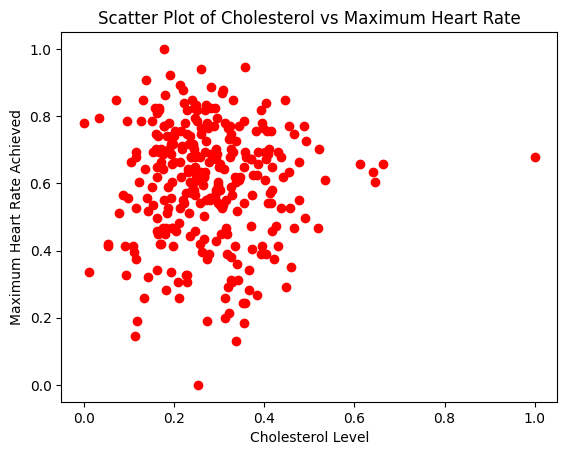

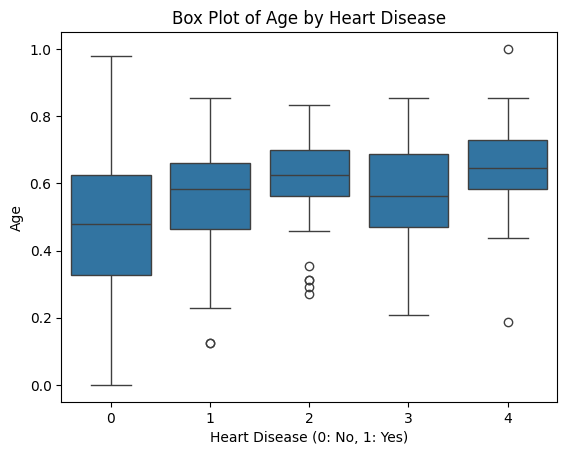

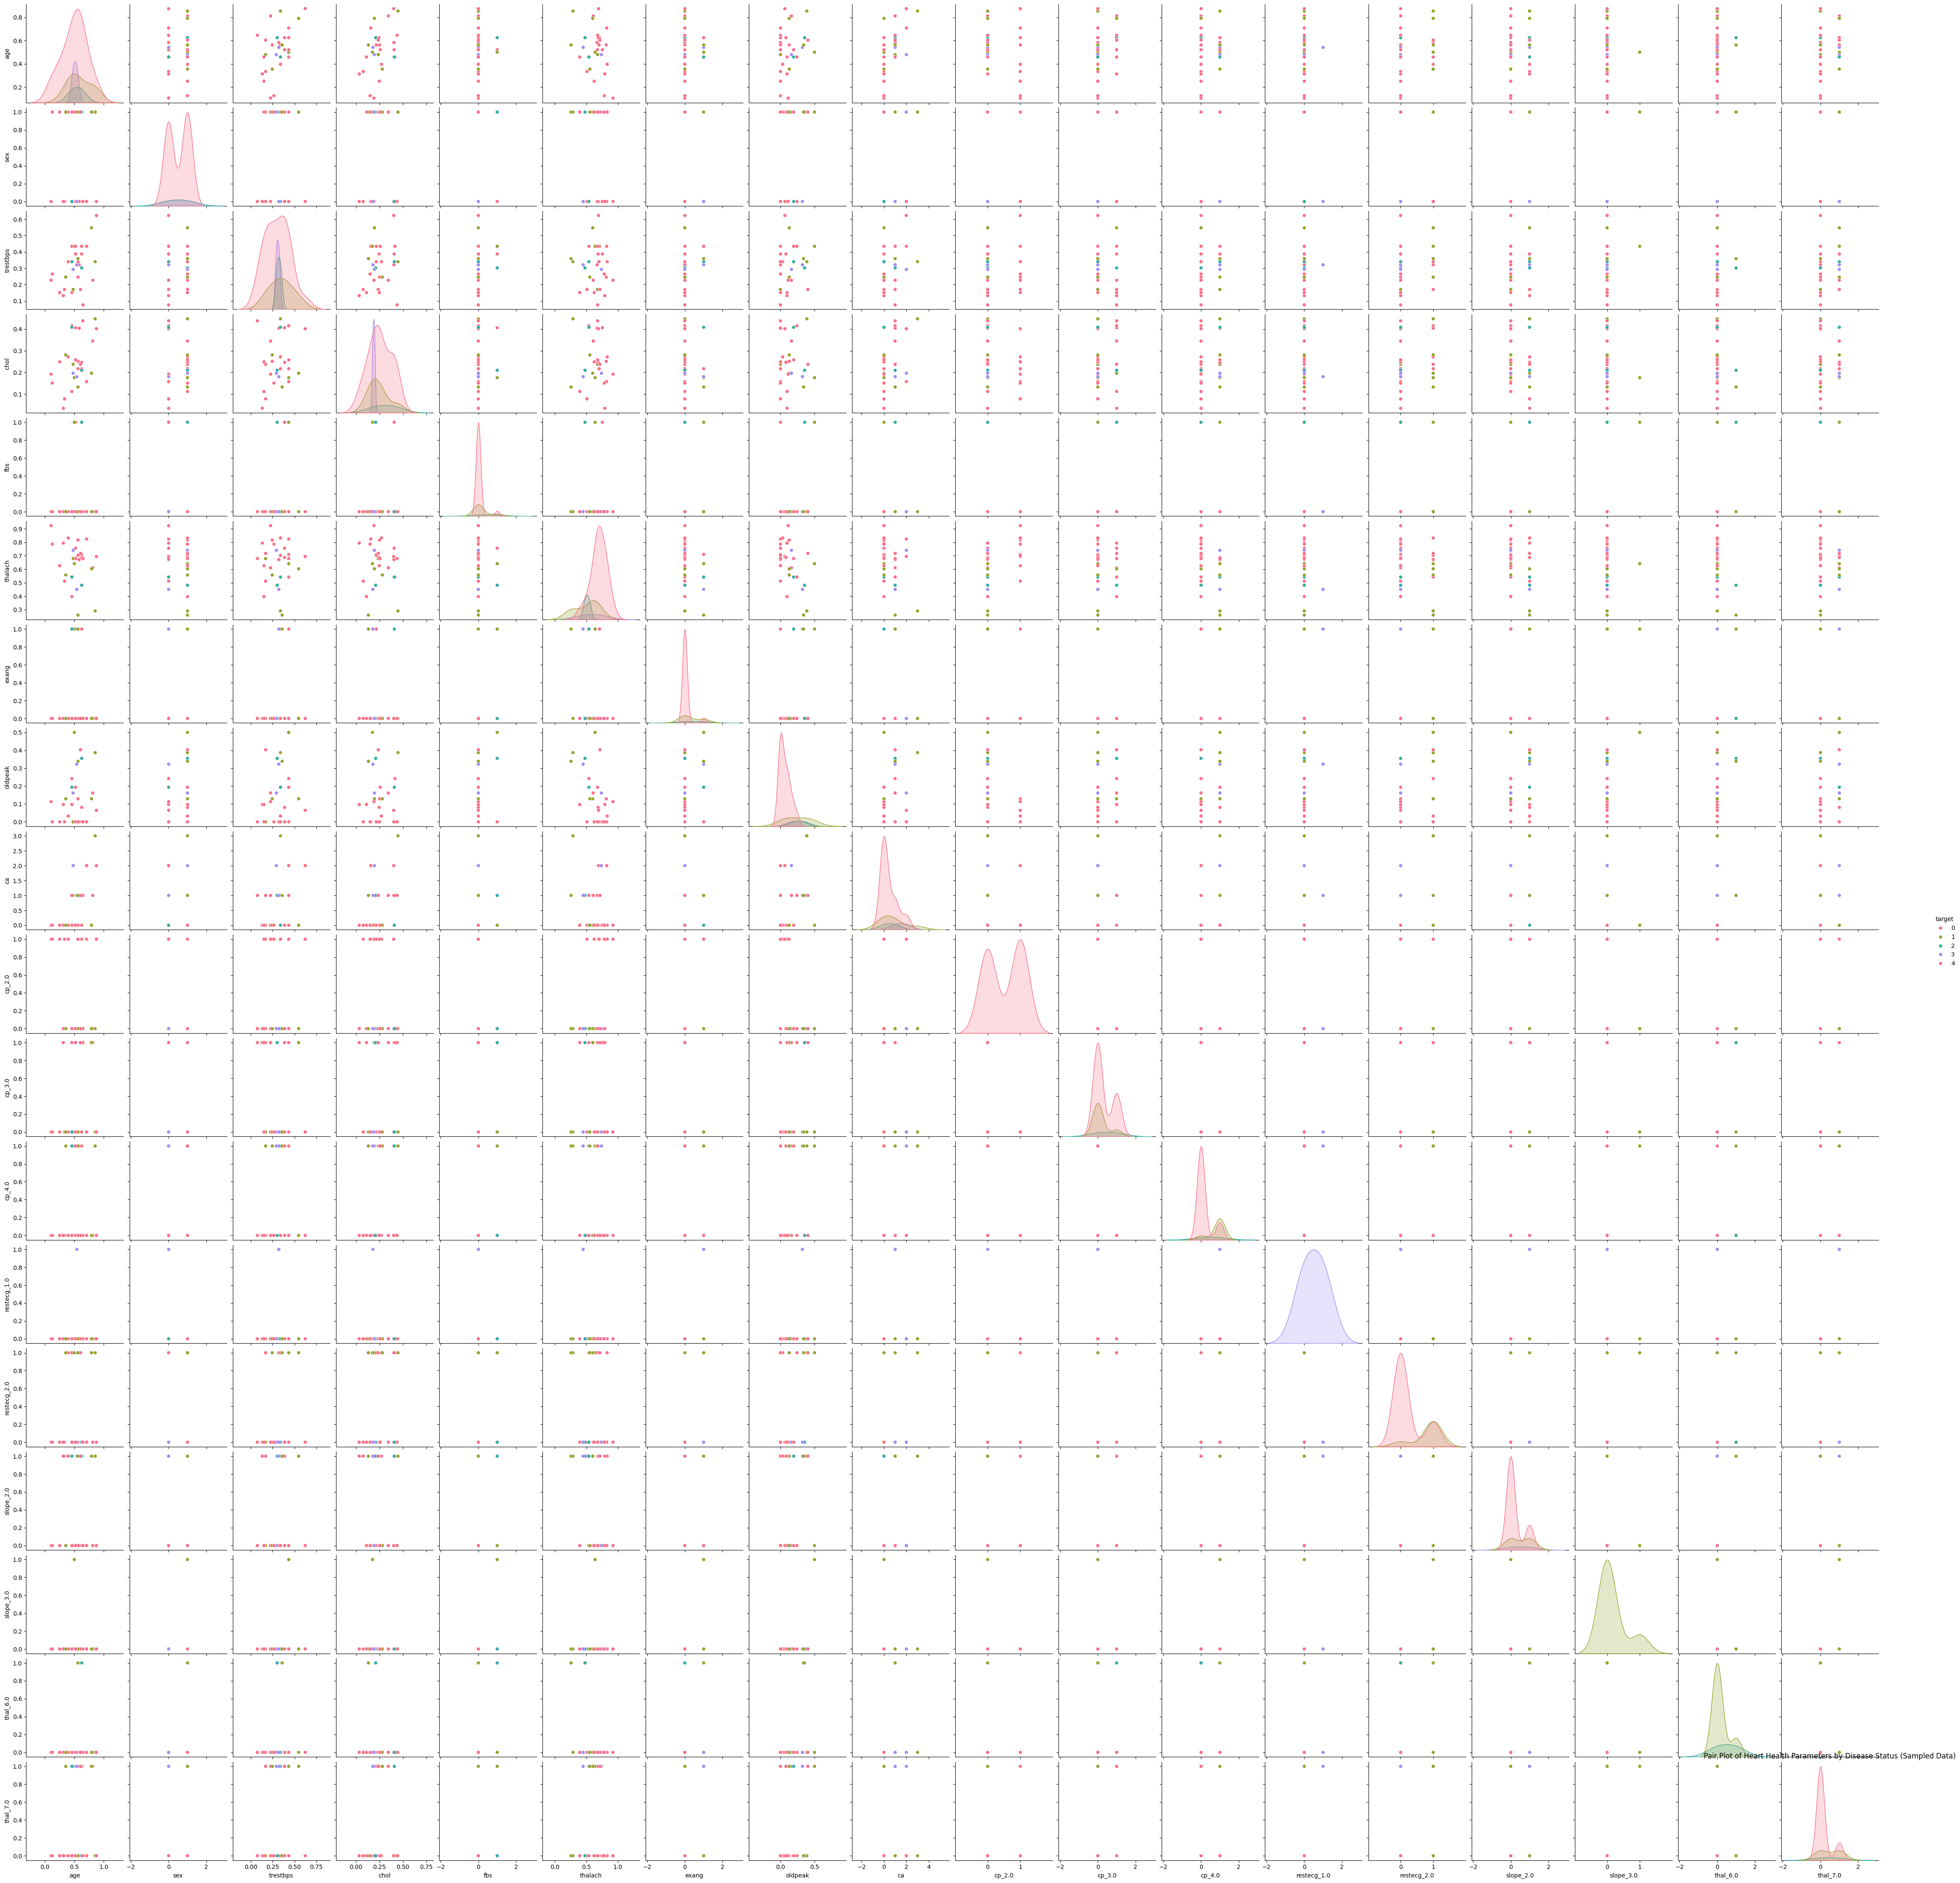

Precision: 0.7307692307692307
Recall: 0.7916666666666666
F1 Score: 0.76
Accuracy: 0.8
Best Model Precision: 0.8260869565217391
Best Model Recall: 0.7916666666666666
Best Model F1 Score: 0.8085106382978724
Best Model Accuracy: 0.85


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import dash
from dash import dcc, html
import plotly.express as px

# URL to the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

print("1. Data Description")
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

print("\n2. Null Data Handling")
print(data.isnull().sum())

# Convert necessary columns to numeric
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

# Drop rows with any missing values
data.dropna(inplace=True)

print("\n3. Data Validation")
print(data['cp'].unique())

print("\n4. Data Reshaping")
transposed_data = data.T
print(transposed_data)

print("\n6. Data Aggregation")
grouped_data = data.groupby('sex').mean()
print(grouped_data)

print("\n7. Exploratory Data Analysis (EDA)")
sns.scatterplot(x='chol', y='thalach', data=data)
plt.title('Scatter plot between Cholesterol and Maximum Heart Rate')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.show()

print("\n8. Feature Engineering")
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)
print(data.head())

# Scatter plot with correct column names
plt.scatter(data['chol'], data['thalach'], color="red")
plt.xlabel('Cholesterol Level')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Scatter Plot of Cholesterol vs Maximum Heart Rate')
plt.show()

# Box plot with correct column names
sns.boxplot(x=data['target'], y=data['age'])
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Box Plot of Age by Heart Disease')
plt.show()

# Scatter plot using Plotly Express
fig = px.scatter(data, x='thalach', y='trestbps', color='target', hover_data=['age'])
fig.show()

# Sample code for pair plot with sampling
sampled_data = data.sample(frac=0.1, random_state=42)  # Using a 10% sample of the data
sns.pairplot(sampled_data, hue="target", palette="husl")
plt.title("Pair Plot of Heart Health Parameters by Disease Status (Sampled Data)")
plt.show()

# Sample code for interactive dashboard using Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='interactive-plot',
        figure={
            'data': [
                {'x': data['oldpeak'], 'y': data['thalach'], 'mode': 'markers', 'type': 'scatter'}
            ],
            'layout': {
                'title': 'Interactive Scatter Plot',
                'xaxis': {'title': 'ST Depression induced by Exercise'},
                'yaxis': {'title': 'Maximum Heart Rate Achieved'}
            }
        }
    )
])

# Data preparation for machine learning
# Split into features and labels
X = data.drop(columns=['target'])
y = data['target'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict diagnoses for test set
y_pred = model.predict(X_test)

# Evaluation metrics
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=3)
gs.fit(X_train, y_train)

# Best model
best_model = gs.best_estimator_
best_model.fit(X_train, y_train)

# Re-evaluate best model
best_y_pred = best_model.predict(X_test)
best_precision = precision_score(y_test, best_y_pred, average='binary')
best_recall = recall_score(y_test, best_y_pred, average='binary')
best_f1 = f1_score(y_test, best_y_pred, average='binary')
best_accuracy = accuracy_score(y_test, best_y_pred)

print(f'Best Model Precision: {best_precision}')
print(f'Best Model Recall: {best_recall}')
print(f'Best Model F1 Score: {best_f1}')
print(f'Best Model Accuracy: {best_accuracy}')

# Running the Dash app (uncomment the line below to run the app)
# app.run_server(debug=True)


In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 33.0 MB/s eta 0:00:00
